In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
dfbhc = pd.read_csv('~/Documents/DataScience/bhcf1906.txt', sep="^", 
                    usecols=['RSSD9001', 'RSSD9017', 'RSSD9016', 'RSSD9045', 'BHCT2170', 'BHCK3545', 'BHCK3548', 'BHCK1287'],
                    na_values="--------",
#                    dtype={'RSSD9001': np.int32, 'RSSD9017': np.str, 'RSSD9045': np.int32, 'BHCT2170': np.int32, 
#                           'BHDM3545': np.int32, 'BHDM3548': np.int32}, 
                    low_memory=False)
dfbhc.head()

# BHDM3545 and BHDM3548 were terminated on 2018-03-31: change to BHCK####. 

,RSSD9001,RSSD9045,BHCK1287,BHCK3545,BHCK3548,BHCT2170,RSSD9016,RSSD9017
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1020180.0,1.0,452.0,66579.0,45370.0,12745024.0,0.0,BREMER FINANCIAL CORPORATION
2,1020201.0,1.0,NaN,NaN,NaN,NaN,1.0,HSBC USA INC.
3,1020395.0,1.0,NaN,NaN,NaN,NaN,0.0,SOUTHERN NATIONAL CORPORATION
4,1020582.0,1.0,NaN,NaN,NaN,NaN,0.0,WOODTRUST FINANCIAL CORPORATION


Definition of trading assets: complicated. "Assets held in trading accounts include but are not limited to U.S. Treasury securities, U.S. Government agency and corporation obligations, securities issued by states and political subdivisions in the U.S., other bonds, notes, and debentures, certificates of deposit, commercial paper, and bankers acceptances."

https://www.federalreserve.gov/apps/mdrm/data-dictionary/search/item?keyword=3545&show_short_title=False&show_conf=False&rep_status=All&rep_state=Opened&rep_period=Before&date_start=20181210&date_end=20181210

Definition of Item Number 1287
FAIR VALUE OF AVAILABLE-FOR-SALE U.S. TREASURY SECURITIES

"Includes the fair (market) value of all available-for-sale U.S. Treasury securities not held in trading accounts. (See item 0211.)"

My plan to subtract treasuries from trading assets won't work with these numbers. I can't find page atm, but in the Volcker NPR it says "trading assets and liabilities" excludes treasuries and agencies.

In [2]:
#re-orderes cols 
#updated column names from bhdm to bhck

df1 = dfbhc.loc[1:, ['RSSD9001', 'RSSD9017', 'RSSD9016','RSSD9045', 'BHCT2170', 'BHCK3545', 'BHCK3548', 'BHCK1287']]
df1.head()

,RSSD9001,RSSD9017,RSSD9016,RSSD9045,BHCT2170,BHCK3545,BHCK3548,BHCK1287
1,1020180.0,BREMER FINANCIAL CORPORATION,0.0,1.0,12745024.0,66579.0,45370.0,452.0
2,1020201.0,HSBC USA INC.,1.0,1.0,NaN,NaN,NaN,NaN
3,1020395.0,SOUTHERN NATIONAL CORPORATION,0.0,1.0,NaN,NaN,NaN,NaN
4,1020582.0,WOODTRUST FINANCIAL CORPORATION,0.0,1.0,NaN,NaN,NaN,NaN
5,1020667.0,NORTHWEST INVESTMENT CORP.,0.0,1.0,NaN,NaN,NaN,NaN


In [3]:
#rename columns. BHCK1287 is fair value and AFS treasuries, a proxy for treasuries to be excluded from the trading assets. 
#update: that won't work. 1287 excludes treasuries held in trading accounts. Will leave anyway. 

df1 = df1.rename(index=str, columns={"RSSD9001": "rssd_id", "RSSD9017": "legal_name", "RSSD9045":"bhc_indicator", 
                                             "RSSD9016": "fhc_idicator", "BHCT2170":"total_assets","BHCK3545":"trading_assets", 
                                             "BHCK3548": "trading_liab", 'BHCK1287': 'treasuries'}
              )


In [4]:
#checking...
df1.head()

,rssd_id,legal_name,fhc_idicator,bhc_indicator,total_assets,trading_assets,trading_liab,treasuries
1,1020180.0,BREMER FINANCIAL CORPORATION,0.0,1.0,12745024.0,66579.0,45370.0,452.0
2,1020201.0,HSBC USA INC.,1.0,1.0,NaN,NaN,NaN,NaN
3,1020395.0,SOUTHERN NATIONAL CORPORATION,0.0,1.0,NaN,NaN,NaN,NaN
4,1020582.0,WOODTRUST FINANCIAL CORPORATION,0.0,1.0,NaN,NaN,NaN,NaN
5,1020667.0,NORTHWEST INVESTMENT CORP.,0.0,1.0,NaN,NaN,NaN,NaN


In [6]:
#add aggregate trading
df1['aggr_trading'] = df1['trading_assets'] + df1['trading_liab']
df1.head()

,rssd_id,legal_name,fhc_idicator,bhc_indicator,total_assets,trading_assets,trading_liab,treasuries,aggr_trading
1,1020180.0,BREMER FINANCIAL CORPORATION,0.0,1.0,12745024.0,66579.0,45370.0,452.0,111949.0
2,1020201.0,HSBC USA INC.,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,1020395.0,SOUTHERN NATIONAL CORPORATION,0.0,1.0,NaN,NaN,NaN,NaN,NaN
4,1020582.0,WOODTRUST FINANCIAL CORPORATION,0.0,1.0,NaN,NaN,NaN,NaN,NaN
5,1020667.0,NORTHWEST INVESTMENT CORP.,0.0,1.0,NaN,NaN,NaN,NaN,NaN


In [7]:
##UPDATE this doesnt work. see above.
#aggr_trading_ex_tr is agg trading minus treasuries

#dfsmall['aggr_trading_ex_tr'] = dfsmall['aggr_trading'] - dfsmall['treasuries']
#dfsmall.head()

In [8]:
df1.query('aggr_trading >0').sort_values('total_assets', ascending=False
                                             )

,rssd_id,legal_name,fhc_idicator,bhc_indicator,total_assets,trading_assets,trading_liab,treasuries,aggr_trading
44,1039502.0,JPMORGAN CHASE & CO.,1.0,1.0,2.727379e+09,523171000.0,147602000.0,73990000.0,670773000.0
406,1073757.0,BANK OF AMERICA CORPORATION,1.0,1.0,2.396484e+09,304461000.0,118691000.0,55575000.0,423152000.0
2089,1951350.0,CITIGROUP INC.,1.0,1.0,1.988226e+09,305612000.0,135076000.0,102062000.0,440688000.0
838,1120754.0,WELLS FARGO & COMPANY,1.0,1.0,1.923388e+09,106509000.0,22996000.0,12324000.0,129505000.0
2449,2380443.0,"GOLDMAN SACHS GROUP, INC., THE",1.0,1.0,9.449160e+08,343886000.0,111633000.0,5639000.0,455519000.0
...,...,...,...,...,...,...,...,...,...
1129,1133503.0,CANANDAIGUA NATIONAL CORPORATION,1.0,1.0,2.936400e+06,10214.0,10214.0,3543.0,20428.0
1698,1246533.0,"CIVISTA BANCSHARES, INC",1.0,1.0,2.202995e+06,8598.0,8598.0,1000.0,17196.0
3683,3821916.0,"FIRST COMMAND FINANCIAL SERVICES, INC.",0.0,0.0,1.117987e+06,35636.0,0.0,0.0,35636.0
1350,1142309.0,"MIDWEST INDEPENDENT BANCSHARES, INC.",0.0,1.0,2.927120e+05,16714.0,0.0,0.0,16714.0


In [9]:
dftrading = df1.query('aggr_trading > 0').sort_values('total_assets', ascending=False)
dftrading.head()

,rssd_id,legal_name,fhc_idicator,bhc_indicator,total_assets,trading_assets,trading_liab,treasuries,aggr_trading
44,1039502.0,JPMORGAN CHASE & CO.,1.0,1.0,2.727379e+09,523171000.0,147602000.0,73990000.0,670773000.0
406,1073757.0,BANK OF AMERICA CORPORATION,1.0,1.0,2.396484e+09,304461000.0,118691000.0,55575000.0,423152000.0
2089,1951350.0,CITIGROUP INC.,1.0,1.0,1.988226e+09,305612000.0,135076000.0,102062000.0,440688000.0
838,1120754.0,WELLS FARGO & COMPANY,1.0,1.0,1.923388e+09,106509000.0,22996000.0,12324000.0,129505000.0
2449,2380443.0,"GOLDMAN SACHS GROUP, INC., THE",1.0,1.0,9.449160e+08,343886000.0,111633000.0,5639000.0,455519000.0


In [10]:
#here adding group col to put the banks by the designations proposed in the 2018 Volcker NPR
dftrading['group'] = pd.cut(dftrading['aggr_trading'], [1, 1000000, 10000000, 21625600100], 
                            labels=['Limited', 'Moderate', 'Significant'])
dftrading.head()

,rssd_id,legal_name,fhc_idicator,bhc_indicator,total_assets,trading_assets,trading_liab,treasuries,aggr_trading,group
44,1039502.0,JPMORGAN CHASE & CO.,1.0,1.0,2.727379e+09,523171000.0,147602000.0,73990000.0,670773000.0,Significant
406,1073757.0,BANK OF AMERICA CORPORATION,1.0,1.0,2.396484e+09,304461000.0,118691000.0,55575000.0,423152000.0,Significant
2089,1951350.0,CITIGROUP INC.,1.0,1.0,1.988226e+09,305612000.0,135076000.0,102062000.0,440688000.0,Significant
838,1120754.0,WELLS FARGO & COMPANY,1.0,1.0,1.923388e+09,106509000.0,22996000.0,12324000.0,129505000.0,Significant
2449,2380443.0,"GOLDMAN SACHS GROUP, INC., THE",1.0,1.0,9.449160e+08,343886000.0,111633000.0,5639000.0,455519000.0,Significant


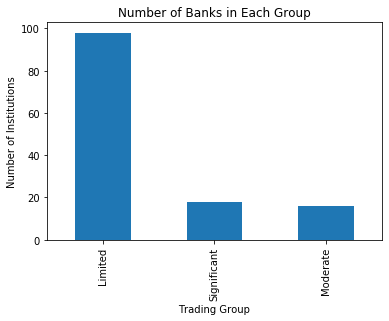

In [12]:
dftrading.group.value_counts().plot(kind='bar')
plt.title('Number of Banks in Each Group')
plt.xlabel('Trading Group')
plt.ylabel('Number of Institutions');

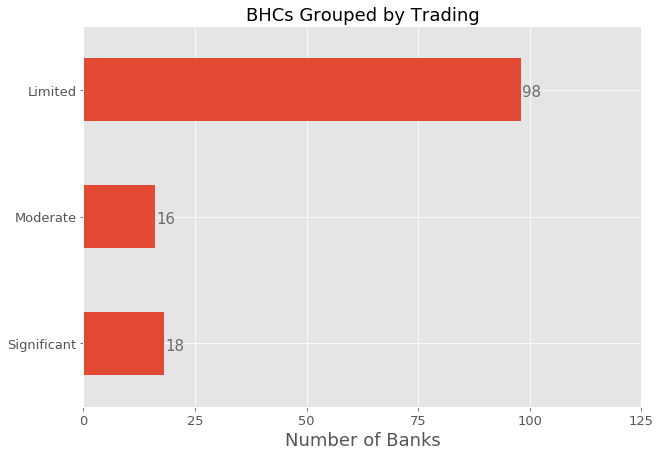

In [13]:
# A nicer looking plot of the above
#plotting the groups based on adjusted trading aggregates.
plt.style.use('ggplot')
%matplotlib inline
order = ['Limited', 'Moderate', 'Significant']

#'.loc[order]' gets the value counts to follow the desired order
ax = dftrading.group.value_counts().loc[order].plot(kind='barh', figsize=(10,7),
                                        fontsize=13);
ax.set_alpha(0.8)
ax.set_title("BHCs Grouped by Trading", fontsize=18)
ax.set_xlabel("Number of Banks", fontsize=18);
ax.set_xticks([0, 25, 50, 75, 100, 125])


# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.3, \
            str(i.get_width()), fontsize=15, color='dimgrey')

# invert for limited on top 
ax.invert_yaxis()

This special chart is based on this website: 
http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
I dont know what the 'patches' refers to exactly. I took out the totals calculation that lets you use percentage labels. To do that you change the last line of the for loop to this str(round((i.get_width()/total)*100, 2))+'%'

In [16]:
dftrading['aggr_trading_b'] = dftrading['aggr_trading']/1000000
dftrading.head()

,rssd_id,legal_name,fhc_idicator,bhc_indicator,total_assets,trading_assets,trading_liab,treasuries,aggr_trading,group,aggr_trading_b
44,1039502.0,JPMORGAN CHASE & CO.,1.0,1.0,2.727379e+09,523171000.0,147602000.0,73990000.0,670773000.0,Significant,670.773
406,1073757.0,BANK OF AMERICA CORPORATION,1.0,1.0,2.396484e+09,304461000.0,118691000.0,55575000.0,423152000.0,Significant,423.152
2089,1951350.0,CITIGROUP INC.,1.0,1.0,1.988226e+09,305612000.0,135076000.0,102062000.0,440688000.0,Significant,440.688
838,1120754.0,WELLS FARGO & COMPANY,1.0,1.0,1.923388e+09,106509000.0,22996000.0,12324000.0,129505000.0,Significant,129.505
2449,2380443.0,"GOLDMAN SACHS GROUP, INC., THE",1.0,1.0,9.449160e+08,343886000.0,111633000.0,5639000.0,455519000.0,Significant,455.519


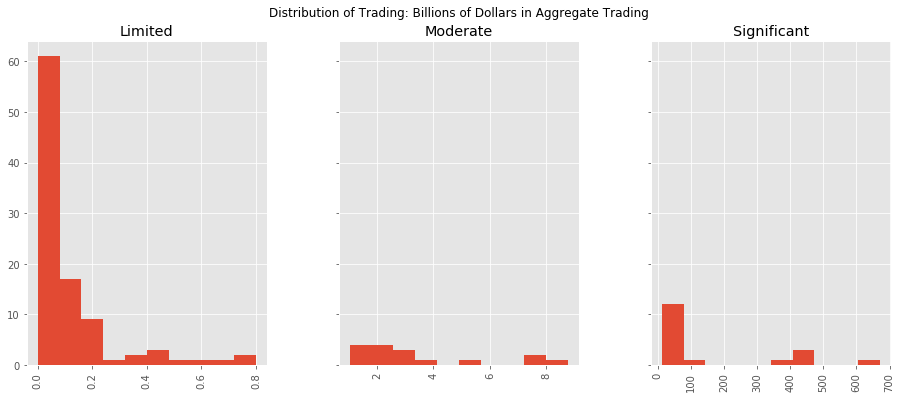

In [32]:
# Plotting the distribution of bank trading activity. 
# Vast majority of banks trade very little. 

dftrading['aggr_trading_b'].hist(by=dftrading['group'], figsize=(15,6), layout=(1,3), bins=10, label='bla bla', sharey=True)

plt.suptitle('Distribution of Trading: Billions of Dollars in Aggregate Trading');

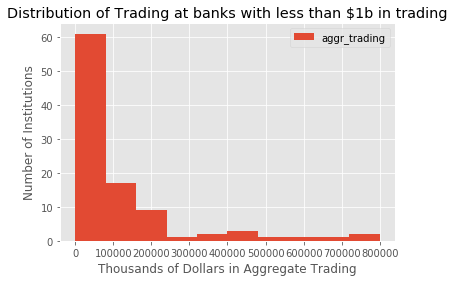

In [33]:
dftrading[dftrading['group'] == 'Limited'].plot(y='aggr_trading', kind='hist')
plt.title('Distribution of Trading at banks with less than $1b in trading')
plt.xlabel('Thousands of Dollars in Aggregate Trading')
plt.ylabel('Number of Institutions');

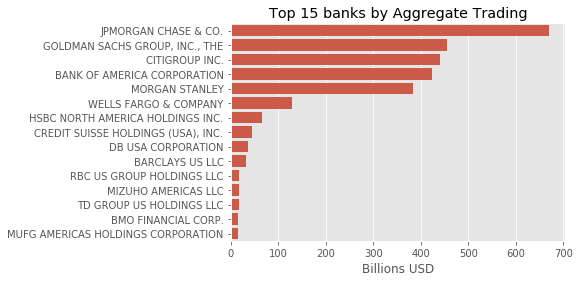

In [65]:
# Helpful: https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib

import seaborn as sb
base_color = sb.color_palette()[0]
top_banks = dftrading.sort_values(by=['aggr_trading_b'], ascending=False).head(15)
fig = sb.barplot(data = top_banks, y = 'legal_name', x = 'aggr_trading_b', color=base_color)

#fig.set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')

fig.set_ylabel('')
fig.set_xlabel('Billions USD')
fig.set_title('Top 15 banks by Aggregate Trading');

In [ ]:
#dftrading.to_csv('trading_banks_1906.csv', index=False)